<a href="https://colab.research.google.com/github/Abhinavmandve/Rossman_Store_Sales/blob/Heart_Disease_Dataset_Project/Heart_Disease_Pred_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Step 1: Importing the necessary libraries and loading the dataset
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Loading the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, names=names)

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  
(303, 14)
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.0000

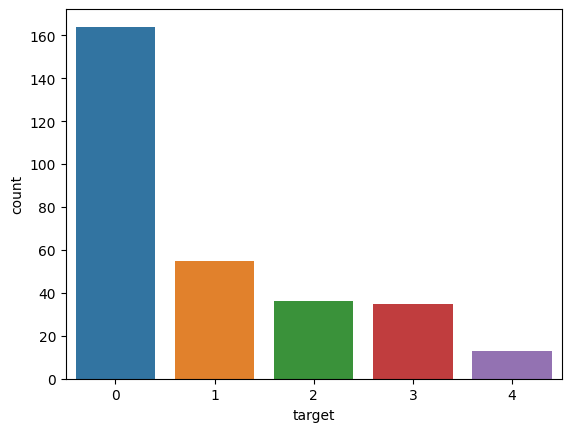

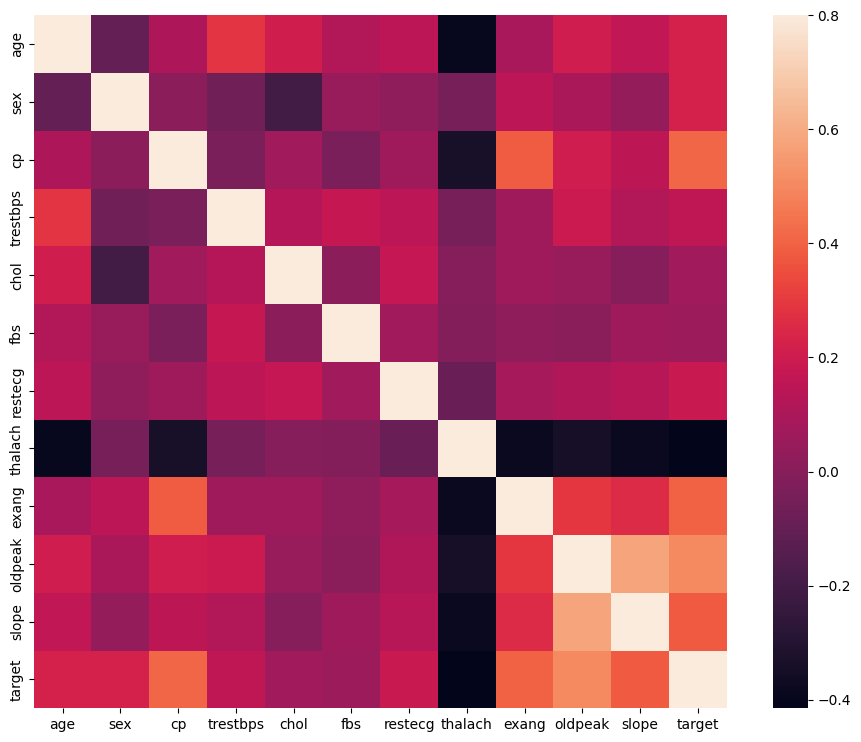

In [2]:
# Step 2: Exploratory Data Analysis (EDA)

# Displaying the first 5 rows of the dataset
print(df.head())

# Checking the shape of the dataset
print(df.shape)

# Checking for missing values
print(df.isnull().sum())

# Summary statistics of the dataset
print(df.describe())

# Distribution of the target variable
print(df.target.value_counts())

# Visualizing the distribution of the target variable
sns.countplot(x='target', data=df)
plt.show()

# Correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [3]:
#Step 3: Preprocessing the data

# Converting categorical variables to dummy variables
cp = pd.get_dummies(df['cp'], prefix='cp', drop_first=True)
thal = pd.get_dummies(df['thal'], prefix='thal', drop_first=True)
slope = pd.get_dummies(df['slope'], prefix='slope', drop_first=True)
frames = [df, cp, thal, slope]
df = pd.concat(frames, axis=1)
df.drop(['cp', 'thal', 'slope'], axis=1, inplace=True)

# Splitting the dataset into training and testing sets
X = df.drop(['target'], axis=1)
y = df['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Replace missing values with the median of the column
X_train = X_train.replace('?', np.nan)
X_train = X_train.apply(lambda x: x.fillna(x.median()),axis=0)
X_test = X_test.replace('?', np.nan)
X_test = X_test.apply(lambda x: x.fillna(x.median()),axis=0)

# Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
from sklearn.feature_selection import SelectKBest
# Create a pipeline with feature selection, scaling, classification, and oversampling to address class imbalance
pipe = make_pipeline(StandardScaler(), SelectKBest(), RandomOverSampler(), XGBClassifier())

In [5]:
# Define the hyperparameters to search
param_grid = {
    'selectkbest__k': range(1, len(X.columns) + 1),
    'xgbclassifier__max_depth': [3, 4, 5],
    'xgbclassifier__n_estimators': [50, 100, 150, 200],
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.5, 1]
}

In [6]:
# Perform grid search with cross-validation to find the best hyperparameters
grid = GridSearchCV(pipe, param_grid, cv=10)
grid.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('randomoversampler',
                                        RandomOverSampler()),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eva...
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'selectkbest__k': range(1, 19),
                         'xgbclassifier__learning_rate': [0.01, 0.1, 0.5, 1],
                         'xgbclassifier__max_depth': [3, 4, 5],
                         'xgbclassifier__n_estimators': [50, 100, 150, 200]})

In [7]:
# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best Hyperparameters: ", grid.best_params_)
print("Best Mean Cross-validated Score: ", grid.best_score_)

# Make predictions on the testing set
y_pred = grid.predict(X_test)

Best Hyperparameters:  {'selectkbest__k': 10, 'xgbclassifier__learning_rate': 0.5, 'xgbclassifier__max_depth': 5, 'xgbclassifier__n_estimators': 200}
Best Mean Cross-validated Score:  0.5996666666666667


Accuracy Score:  0.4262295081967213
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.77        29
           1       0.08      0.08      0.08        12
           2       0.11      0.11      0.11         9
           3       0.17      0.14      0.15         7
           4       0.00      0.00      0.00         4

    accuracy                           0.43        61
   macro avg       0.22      0.23      0.22        61
weighted avg       0.40      0.43      0.41        61



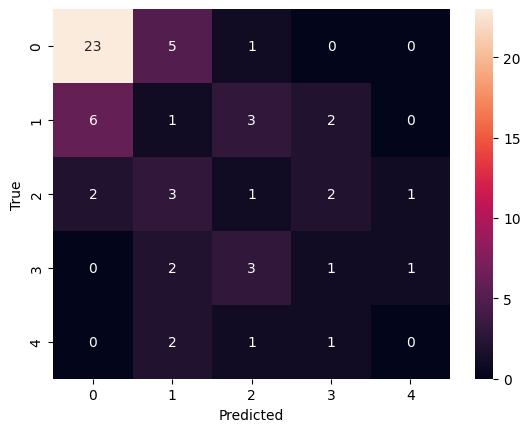

In [8]:
# Calculate accuracy score and print the classification report
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()